# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

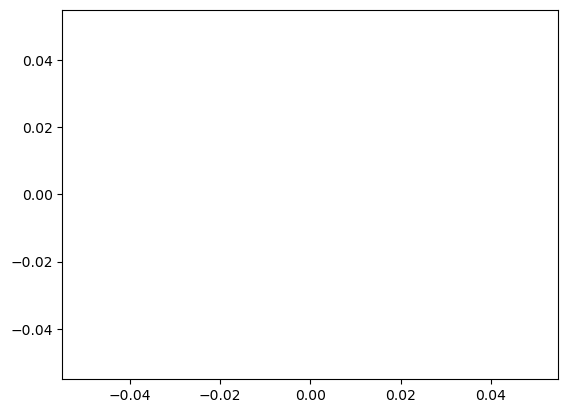

In [2]:
plt.plot()

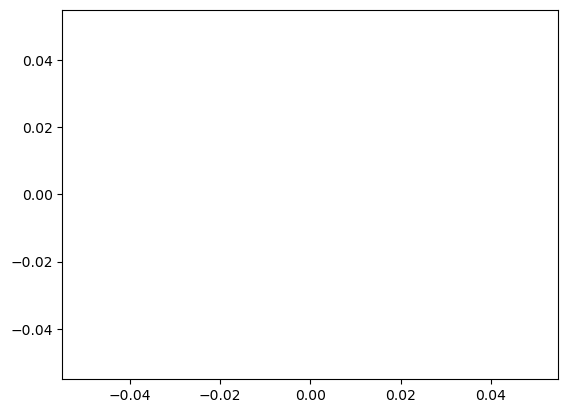

In [3]:
# to get rid of that nasty '[]' just add a semi-colon 
plt.plot();

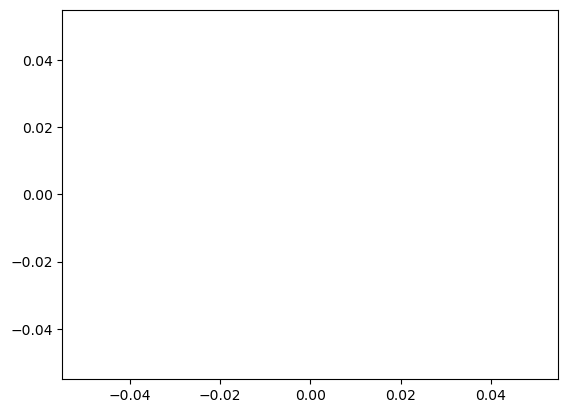

In [4]:
# don't want to use ; then add extra line of code : plt.show()
plt.plot()
plt.show()

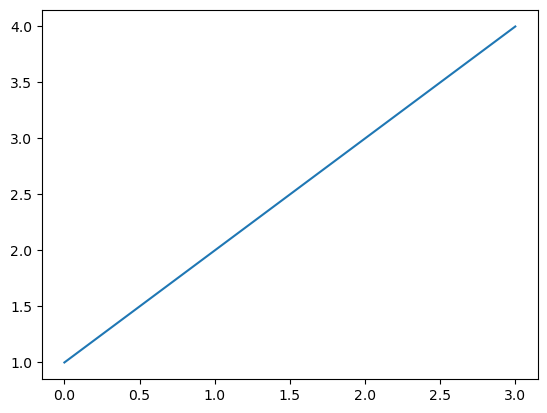

In [5]:
plt.plot([1,2,3,4]);

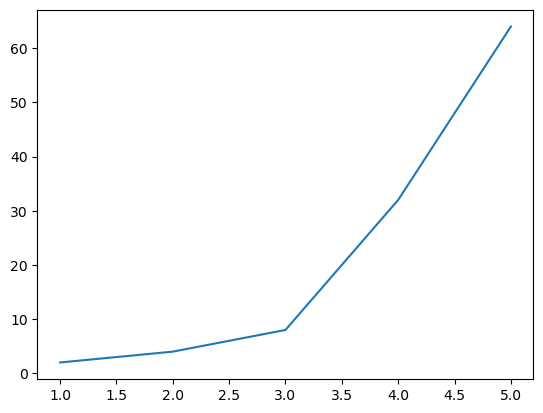

In [6]:
x = [1,2,3,4,5]
y= [2,4,8,32,64]
plt.plot(x,y);

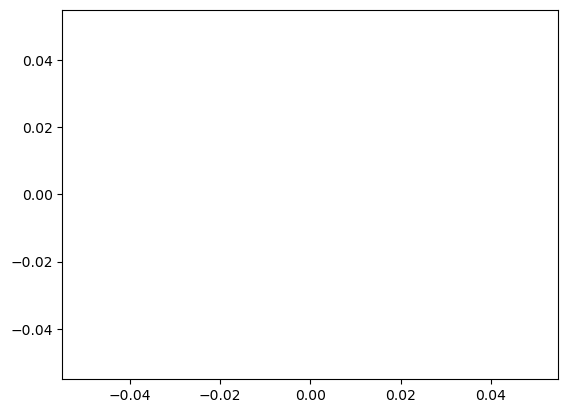

In [7]:
plt.plot();

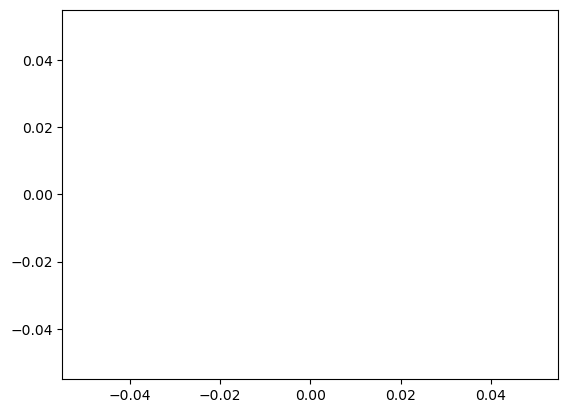

In [8]:
# 1 st method 
fig = plt.figure(); # creates a figure
ax = fig.add_subplot() # adds some axes
ax.plot();
# plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

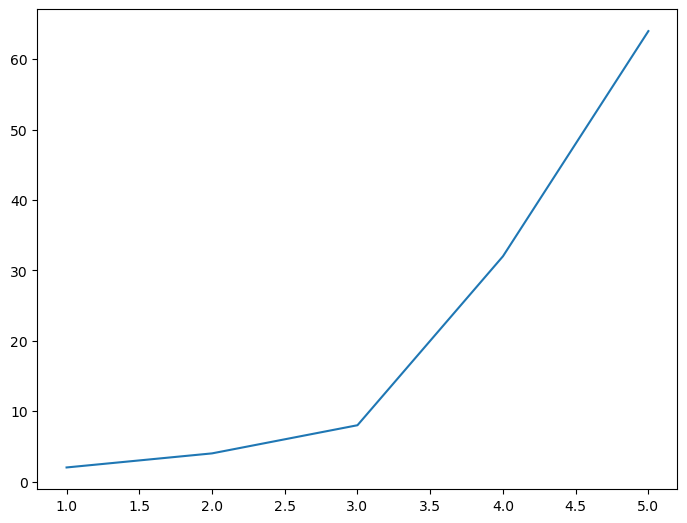

In [9]:
# 2 nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1]); #
ax.plot(x,y);
# plt.show()
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

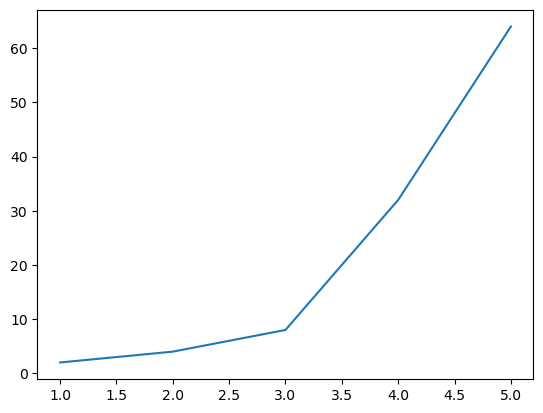

In [10]:
# 3 rd method (recommended)
fig,ax = plt.subplots() 
ax.plot(x,y);# add some data
type(fig), type(ax)

<img src="../images/matplotlib-anatomy-of-a-plot.png" />

# Matplotlib workflow

## simple workflow

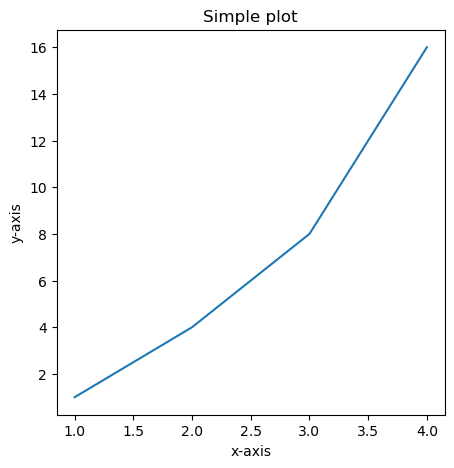

In [11]:
# 0. import matolotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
#step 1. Prepare data
x = [1,2,3,4]
y = [1,4,8,16]

# 2. setup plot
fig, ax = plt.subplots(figsize=(5,5)) # width,height

#3.plot the data
ax.plot(x,y)

# 4. customize plot
ax.set(title='Simple plot',
       xlabel ='x-axis',
        ylabel = 'y-axis')

# 5. Save & share (you save the figure )
fig.savefig('images\sample-plot.png')

## Making figures with numpy arrays
We want : 
* Line    Plot
* Scatter Plot
* Bar     Plot
* Hist    Plot
* Subplots

In [12]:
import numpy as np

In [4]:
# create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

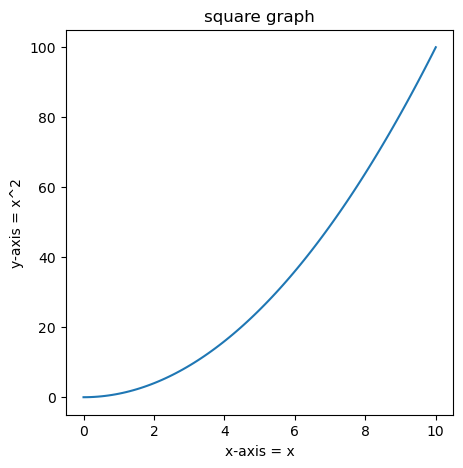

In [5]:
# plot the data and create a line plot
fig , ax = plt.subplots(figsize=(5,5))
ax.set(title="square graph",
      xlabel= 'x-axis = x',
      ylabel='y-axis = x^2')
ax.plot(x,x**2);

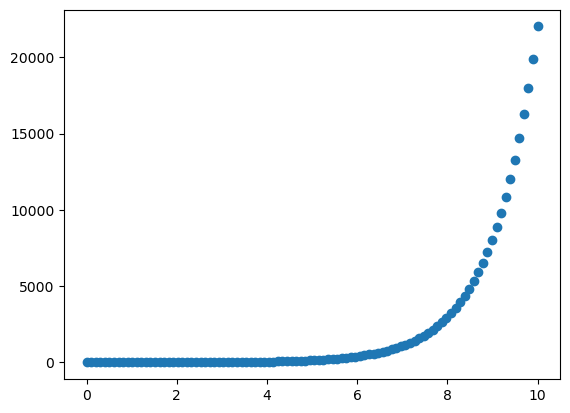

In [15]:
# use same data and make a scatter plot
fit,ax = plt.subplots() # if you want to recreate plots you have to reset fig and ax if we are in a different cell
ax.scatter(x,np.exp(x));

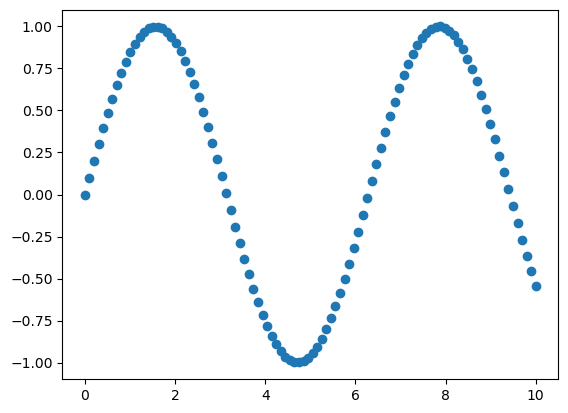

In [16]:
# another scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x));

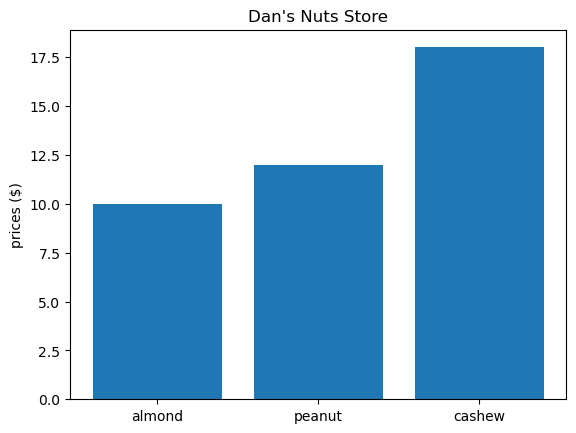

In [17]:
# make a plot from dictionary
dict = {"almond" : 10,
        "peanut":12,
        "cashew" : 18}
fig,ax = plt.subplots()
ax.bar(dict.keys(), dict.values());
ax.set(title='Dan\'s Nuts Store', ylabel='prices ($)');

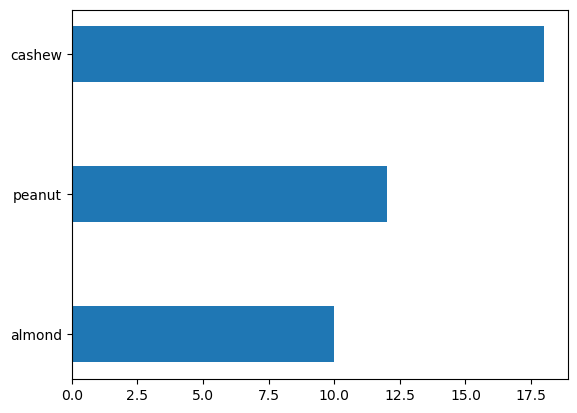

In [18]:
# horizontal bar graph
fig,ax = plt.subplots()
ax.barh(list(dict.keys()),list(dict.values()),height=0.4);

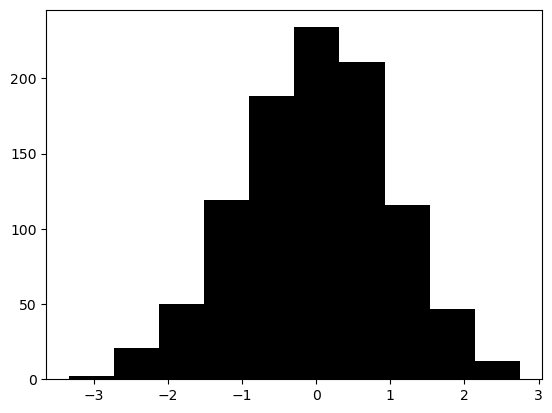

In [7]:
# make some data for histograms
x = np.random.randn(1000)
fig,ax = plt.subplots()
ax.hist(x,color='black');

### two options for subplots


tuple

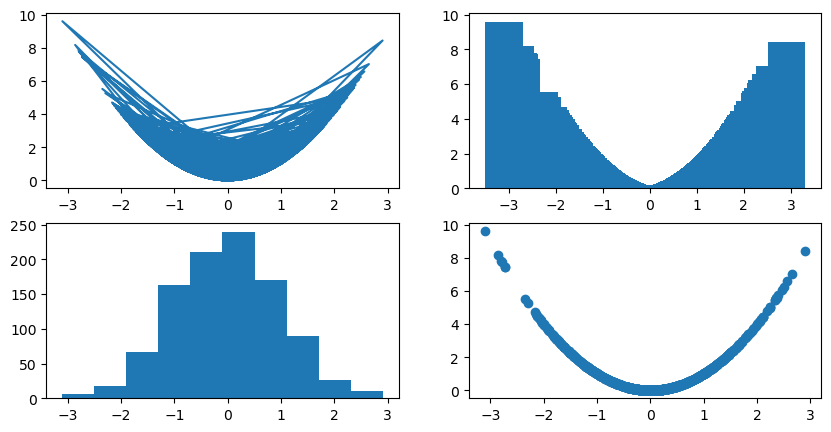

In [20]:
# subplot option 1
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows = 2, 
                                       ncols=2,
                                       figsize=(10,5))
ax1.plot(x,x**2);
ax2.bar(x,x**2);
ax3.hist(x);
ax4.scatter(x,x**2);
type(((ax1,ax2),(ax3,ax4)))

(4, (2, 2), 2, dtype('O'), numpy.ndarray)

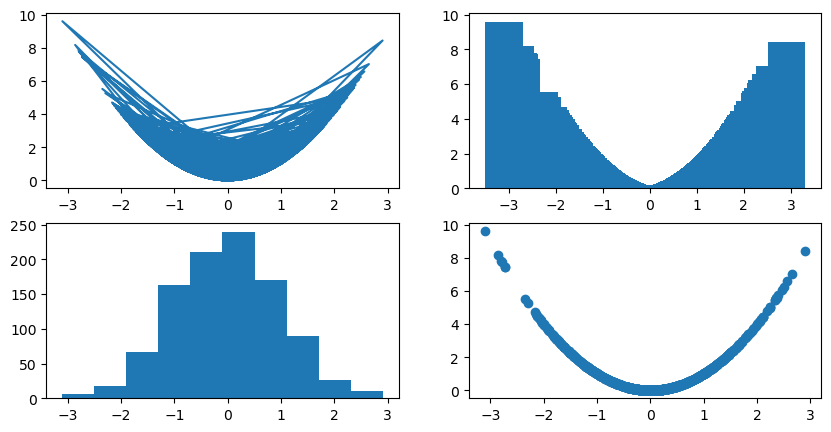

In [21]:
# Subplots option 2
fig,ax = plt.subplots(nrows = 2,
                     ncols = 2,
                     figsize = (10,5))
ax[0,0].plot(x,x**2);
ax[0,1].bar(x,x**2);
ax[1,0].hist(x);
ax[1,1].scatter(x,x**2);
ax.size, ax.shape,ax.ndim, ax.dtype, type(ax)

## Plotting from Pandas DataFrame 

In [22]:
import pandas as pd

In [23]:
# make a DataFrame
car_sales= pd.read_csv('../sample_1/car-sales.csv')
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [24]:
ts = pd.Series(np.random.randn(1000), 
               index = pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -0.266294
2020-01-02    1.071910
2020-01-03    1.134159
2020-01-04   -2.166734
2020-01-05   -0.055683
                ...   
2022-09-22   -0.053267
2022-09-23    0.767636
2022-09-24    0.525106
2022-09-25    0.565853
2022-09-26   -1.160528
Freq: D, Length: 1000, dtype: float64

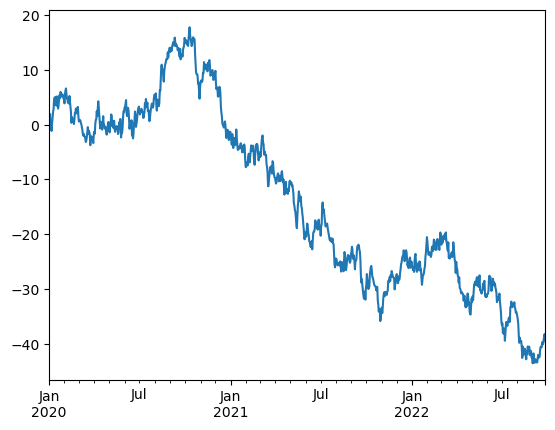

In [25]:
ts = ts.cumsum()
ts.plot();

In [26]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [27]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '',regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [28]:
#remove last 2 zeros
car_sales['Price'] = car_sales['Price'].str[:-2]

In [29]:
car_sales['Date'] = pd.date_range('10/1/2020',periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,4000,2020-10-01
1,Honda,Red,87899,4,5000,2020-10-02
2,Toyota,Blue,32549,3,7000,2020-10-03
3,BMW,Black,11179,5,22000,2020-10-04
4,Nissan,White,213095,4,3500,2020-10-05
5,Toyota,Green,99213,4,4500,2020-10-06
6,Honda,Blue,45698,4,7500,2020-10-07
7,Honda,Blue,54738,4,7000,2020-10-08
8,Toyota,White,60000,4,6250,2020-10-09
9,Nissan,White,31600,4,9700,2020-10-10


In [30]:
car_sales['Total sales'] = car_sales.Price.astype(int).cumsum() # reassign the values from str to int
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price,Date,Total sales
0,Toyota,White,150043,4,4000,2020-10-01,4000
1,Honda,Red,87899,4,5000,2020-10-02,9000
2,Toyota,Blue,32549,3,7000,2020-10-03,16000


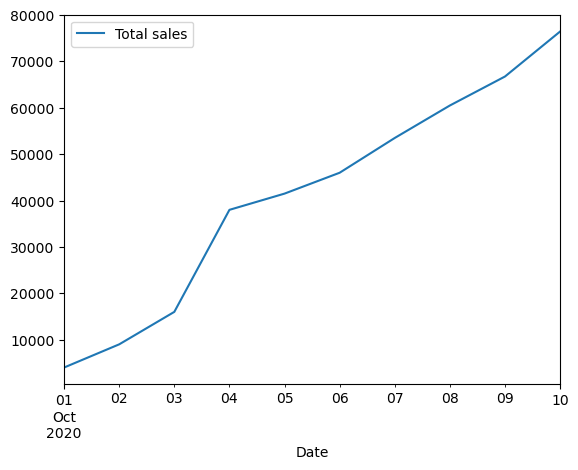

In [31]:
# fig,ax = plt.subplots(figsize=(5,7))
car_sales.plot(x='Date',y='Total sales');

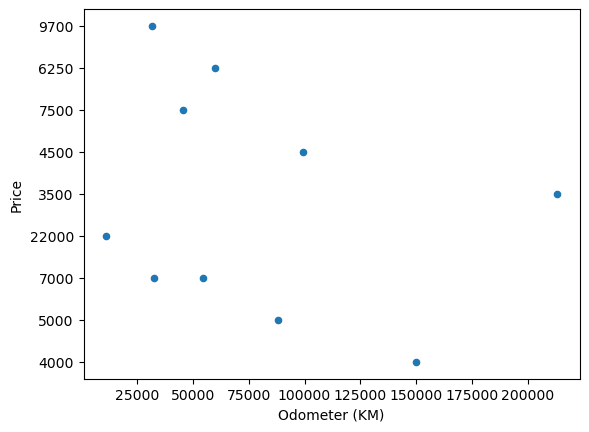

In [32]:
car_sales.plot(x = 'Odometer (KM)', y = 'Price', kind='scatter');

In [33]:
# how about some bar graphs
x = np.random.rand(10,4)
df = pd.DataFrame(x,columns=[ c  for c in 'abcd'])
df

,a,b,c,d
0,0.221236,0.839982,0.183249,0.105182
1,0.567125,0.495387,0.713579,0.457636
2,0.590509,0.722895,0.083953,0.304500
3,0.001782,0.025962,0.752287,0.837198
4,0.405323,0.761351,0.491533,0.326781
5,0.616982,0.002885,0.224852,0.674553
6,0.308472,0.368367,0.280755,0.640615
7,0.219003,0.817385,0.972373,0.904296
8,0.127467,0.691220,0.919710,0.086241
9,0.211090,0.062846,0.212973,0.534701


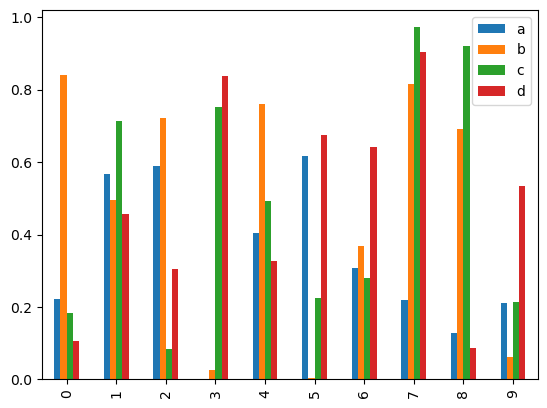

In [34]:
df.plot.bar();

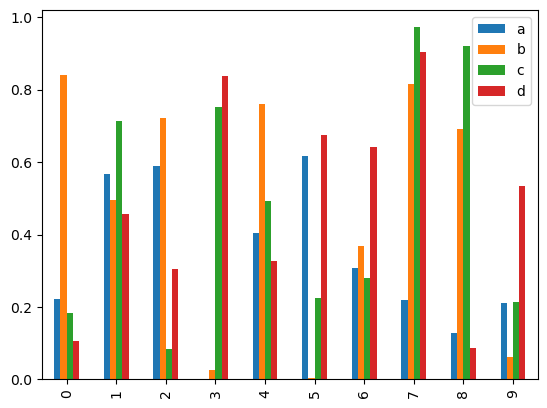

In [35]:
df.plot(kind='bar');

In [36]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Date,Total sales
0,Toyota,White,150043,4,4000,2020-10-01,4000
1,Honda,Red,87899,4,5000,2020-10-02,9000
2,Toyota,Blue,32549,3,7000,2020-10-03,16000
3,BMW,Black,11179,5,22000,2020-10-04,38000
4,Nissan,White,213095,4,3500,2020-10-05,41500


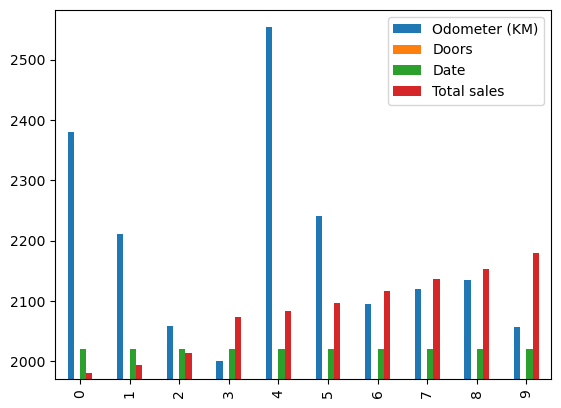

In [37]:
car_sales.plot(kind='bar');

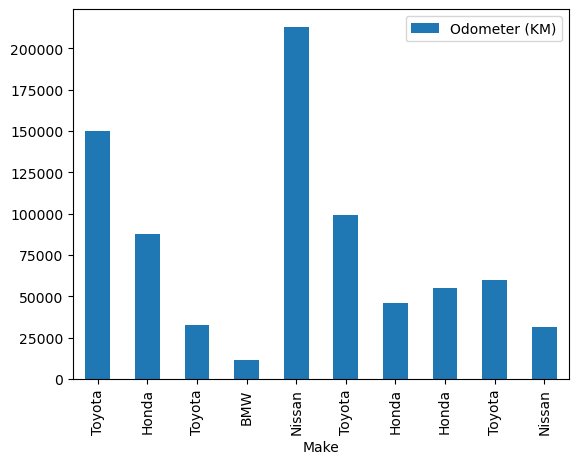

In [38]:
car_sales.plot(y='Odometer (KM)', x='Make',kind='bar');

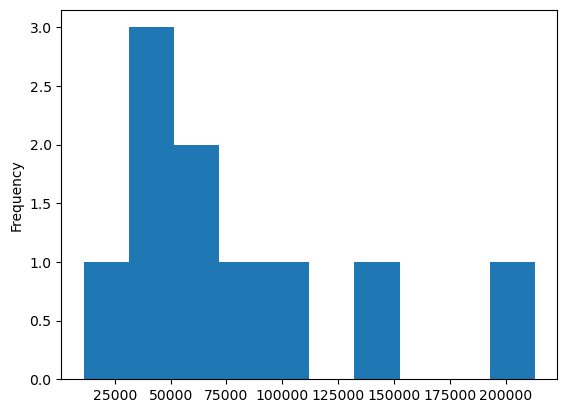

In [39]:
car_sales['Odometer (KM)'].plot.hist();

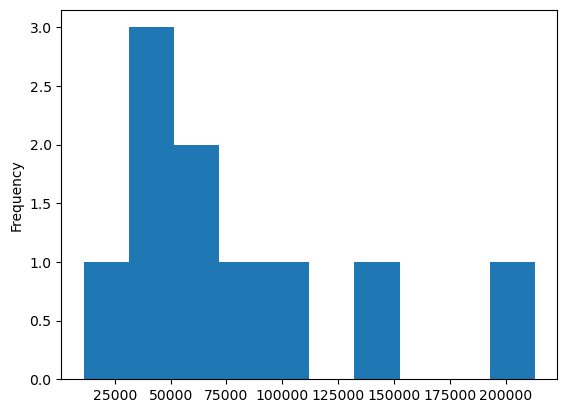

In [40]:
car_sales['Odometer (KM)'].plot(kind='hist');

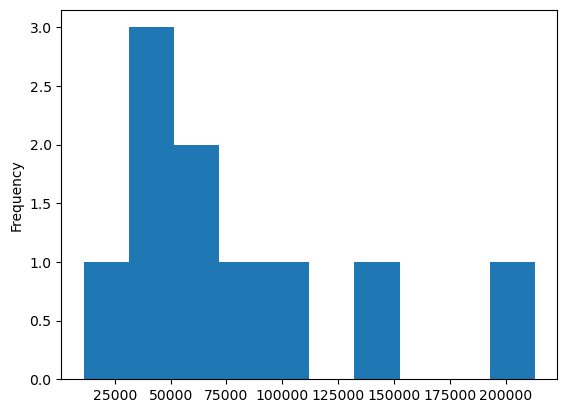

In [41]:
car_sales['Odometer (KM)'].plot.hist(bins=10);

In [42]:
heart = pd.read_csv('data/heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


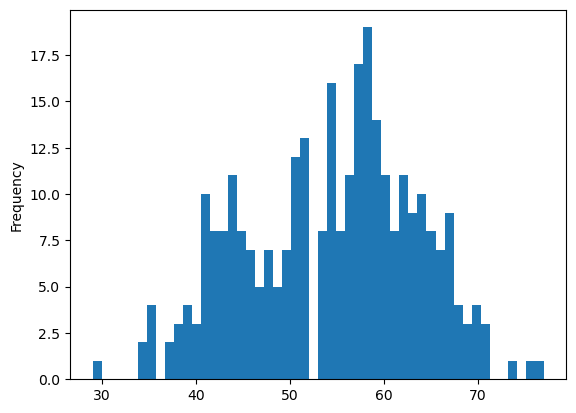

In [43]:
heart.age.plot.hist(bins=50);

In [44]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


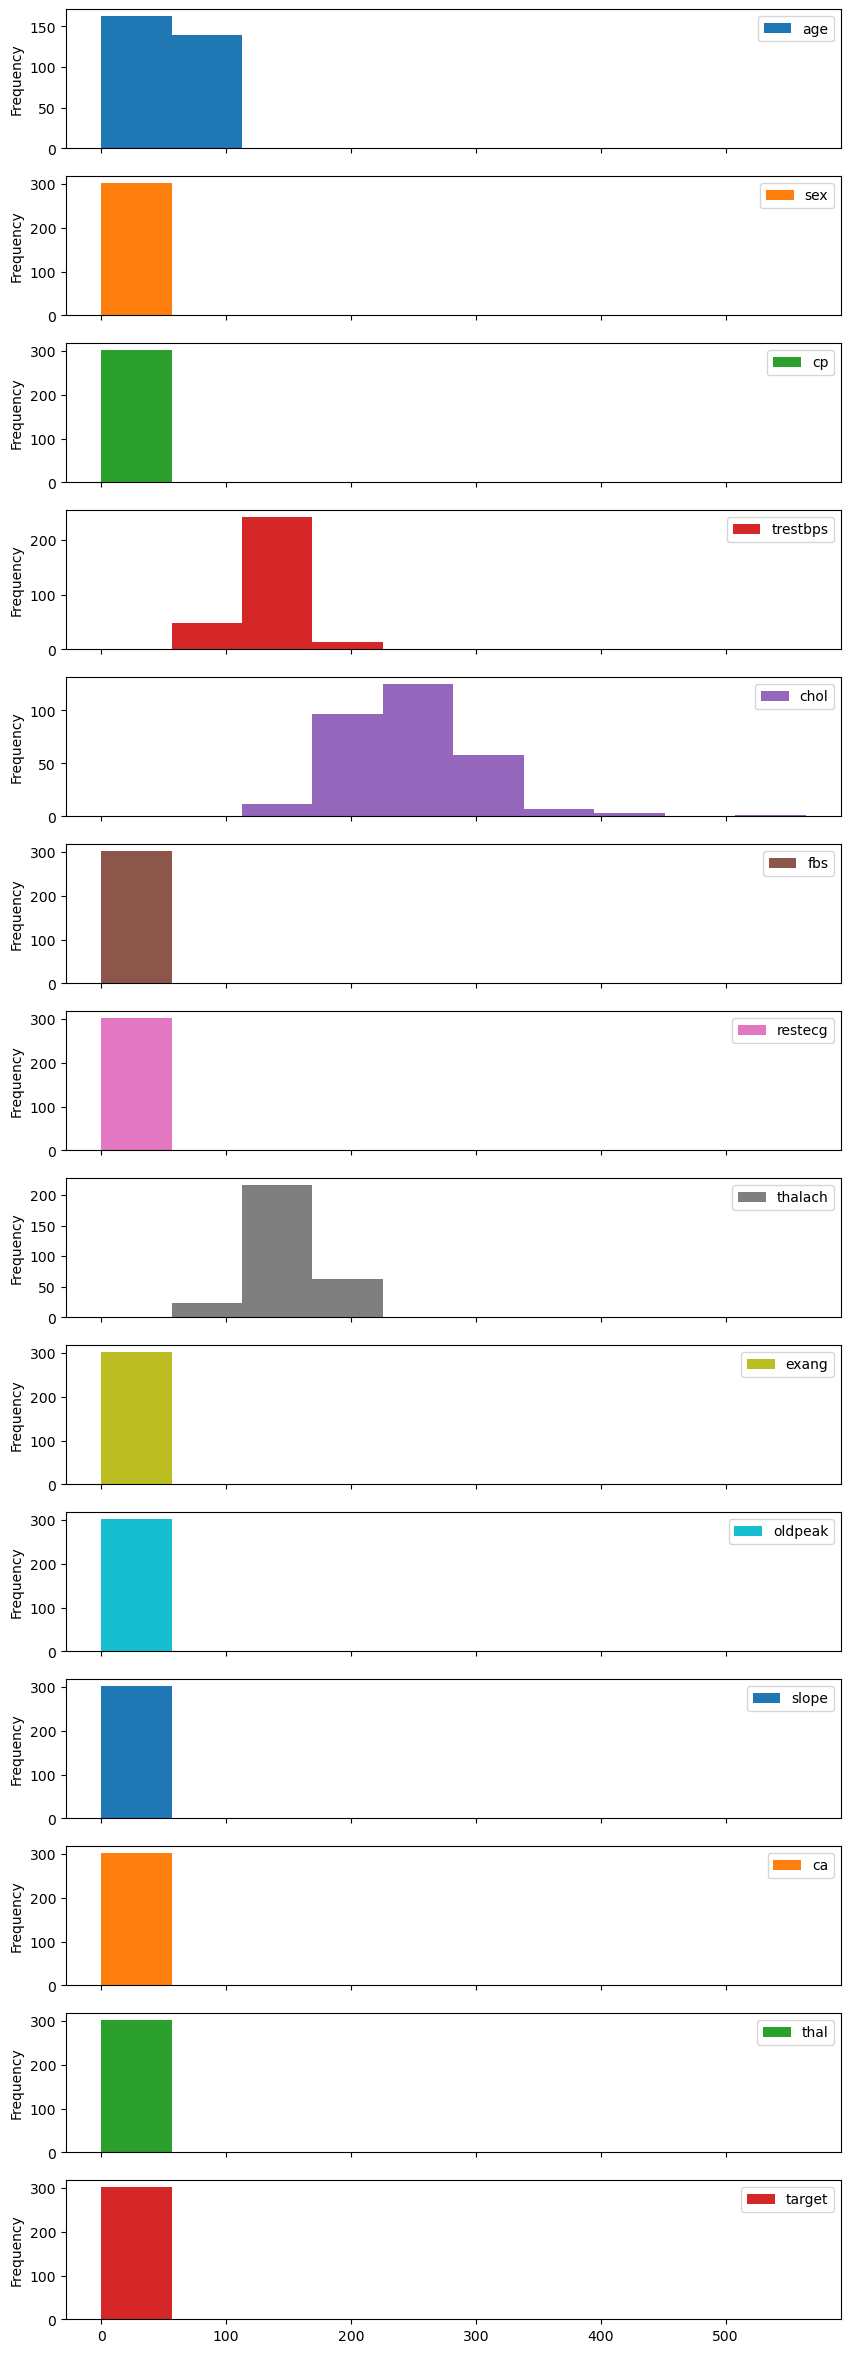

In [45]:
heart.plot.hist(figsize=(10,30),subplots=True);

### which method to use? pyplot vs matplotlib 00 method
* when plotting quickly okay to use pyplot method
* when plotting something advanced use oo method

In [46]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
over_50 = heart[ heart.age > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


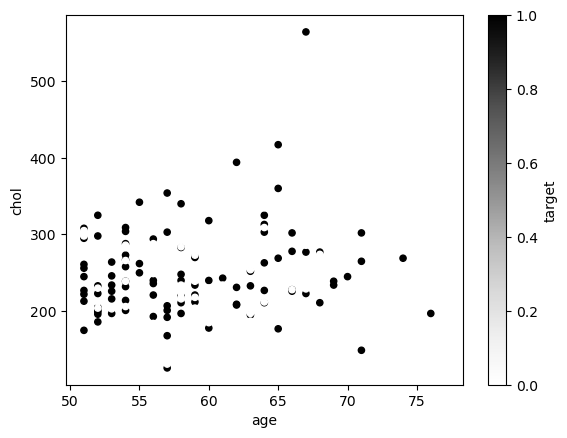

In [48]:
# pyplot method
over_50.plot(kind='scatter', 
             x = 'age',
             y = 'chol',
             c='target');

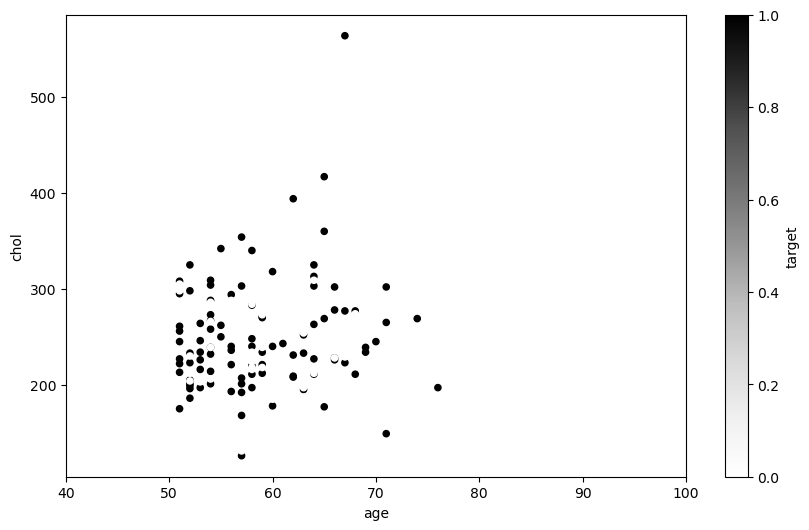

In [49]:
## oo method
fig,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter', 
             x = 'age',
             y = 'chol',
             c='target',
            ax = ax);
ax.set_xlim([40,100]);

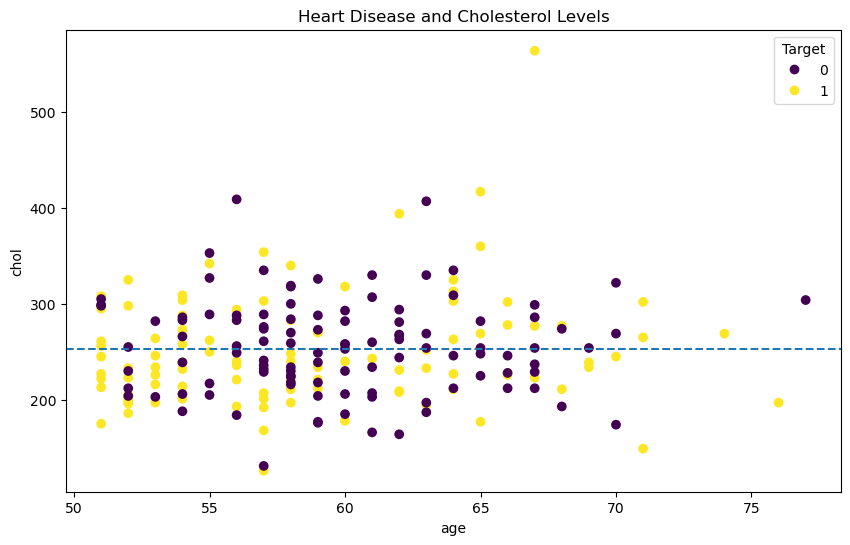

In [55]:
fig ,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=over_50.age,
                     y=over_50.chol,
                    c=over_50.target);
# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel='age',
       ylabel='chol');
# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# add a horizontal line 
ax.axhline(over_50.chol.mean(),
          linestyle='--');

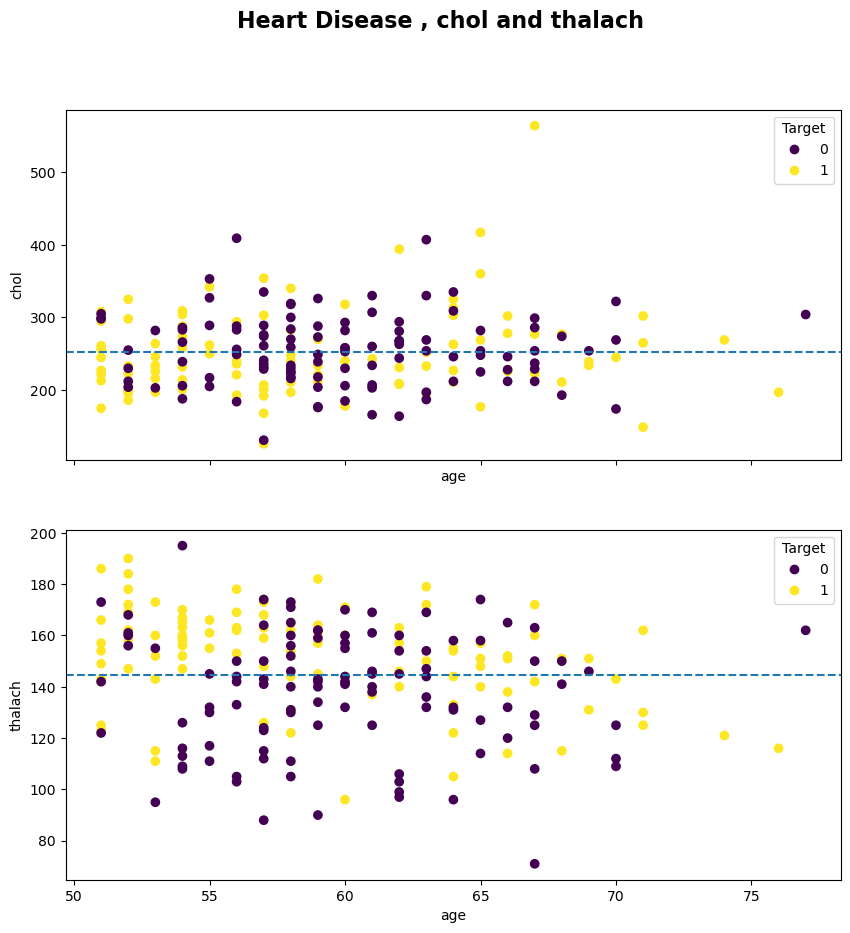

In [85]:
# Subplot of chol,age,thalach
fig, (ax1,ax2) = plt.subplots(figsize=(10,10),nrows=2,ncols=1,sharex=True)
# add x and y to ax1 
scatter = ax1.scatter(x = over_50.age,y = over_50.chol, c = over_50.target);
#customize the ax1
ax1.set(
    # title="Heart Disease and chol ",
        xlabel= "age",
        ylabel="chol");
# add a lengend
ax1.legend(*scatter.legend_elements(), title="Target");
#add a mean line
ax1.axhline(over_50.chol.mean(),linestyle='--');

# add data to ax2
scatter = ax2.scatter(x=over_50.age,y = over_50.thalach, c = over_50.target);
#customize ax2
ax2.set(
    # title="Heart Disease and thalach ",
        xlabel ="age", ylabel="thalach");
#add a legend
ax2.legend(*scatter.legend_elements(), title='Target');
# add a mean line
ax2.axhline(over_50.thalach.mean(), linestyle='--');

# add a title to the entire figure
fig.suptitle("Heart Disease , chol and thalach", fontsize=16,fontweight='bold');

## Customising Matplotlib plots and getting stylish

In [88]:
# see the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [108]:
# car_sales.Price = car_sales.astype(int)
car_sales['Price']=car_sales.Price.astype(int)
car_sales.dtypes

Make                     object
Colour                   object
Odometer (KM)             int64
Doors                     int64
Price                     int32
Date             datetime64[ns]
Total sales               int32
dtype: object

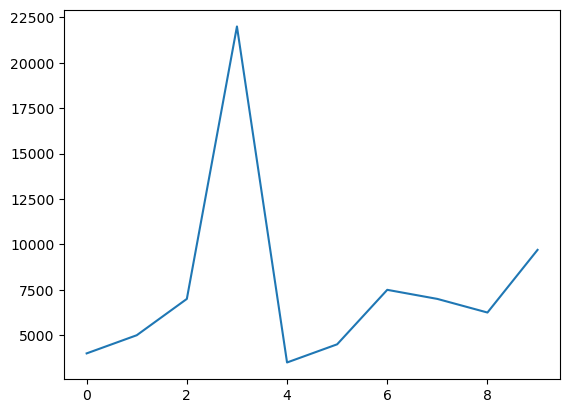

In [110]:
car_sales.Price.plot();

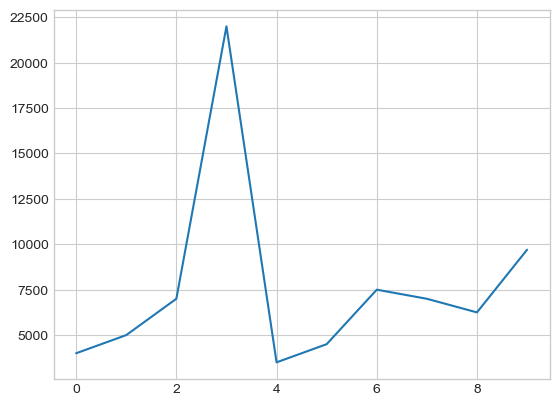

In [112]:
plt.style.use('seaborn-v0_8-whitegrid');
car_sales.Price.plot();

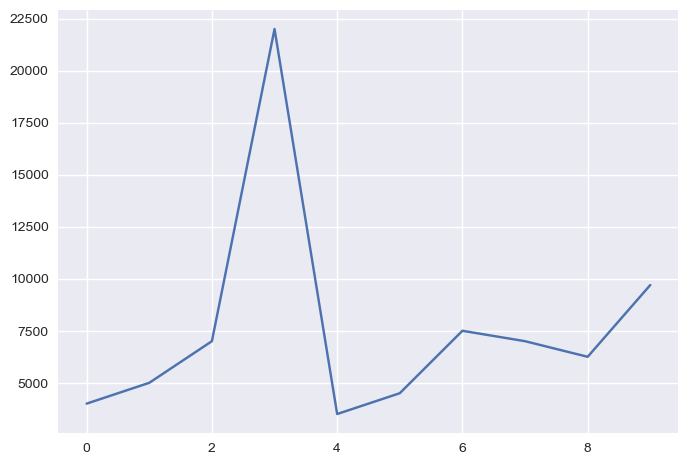

In [114]:
plt.style.use('seaborn-v0_8');
car_sales.Price.plot();

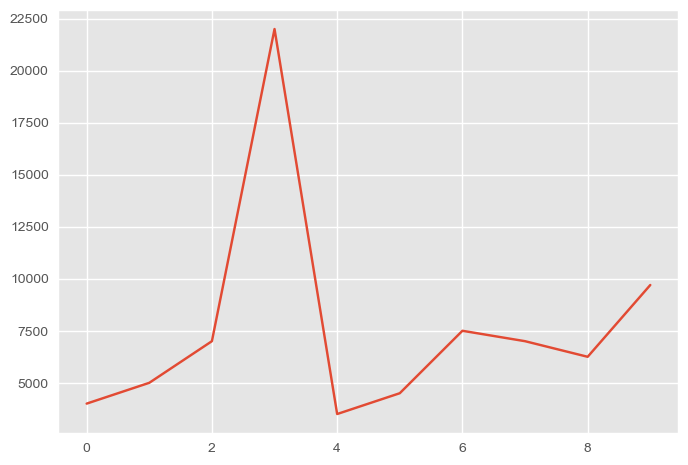

In [116]:
plt.style.use('ggplot')
car_sales.Price.plot();

In [118]:
# create some dummy data
x = np.random.randn(10,4)
df = pd.DataFrame(x, columns=[c for c in 'abcd'])
df

,a,b,c,d
0,-0.229292,-0.184425,-0.635510,-1.452722
1,0.220686,-0.087953,0.137232,-1.351361
2,-1.768807,-0.342655,-0.245862,-0.134482
3,0.372514,0.035826,0.704030,1.003637
4,-0.576545,-0.338007,-1.066848,1.051129
5,-1.050153,0.356831,-0.348695,1.345911
6,0.024738,-1.203581,-0.660223,-2.318471
7,0.351679,-0.771583,0.420777,-0.421700
8,1.072750,-2.420605,1.067615,1.695045
9,-0.015951,1.927880,-0.394104,-0.140995


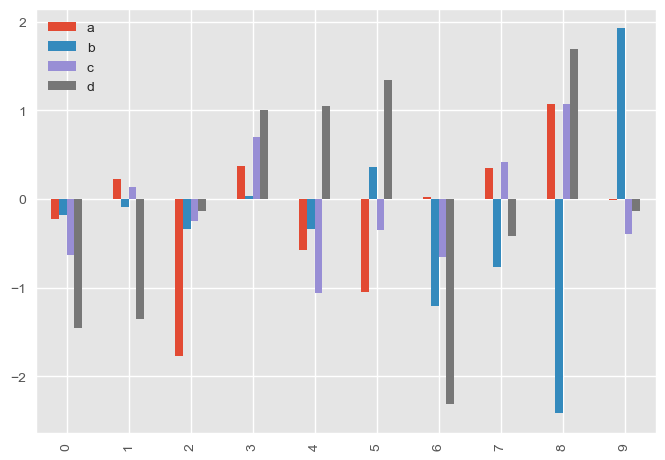

In [119]:
ax = df.plot(kind =  'bar');

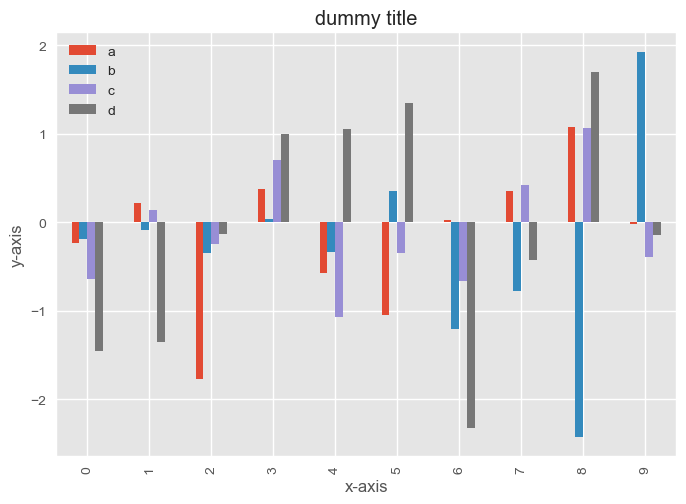

In [121]:
# customize our plot with set method
ax =df.plot(kind='bar')
ax.set(title='dummy title',
       xlabel= 'x-axis',
       ylabel = 'y-axis')
ax.legend().set_visible(True);

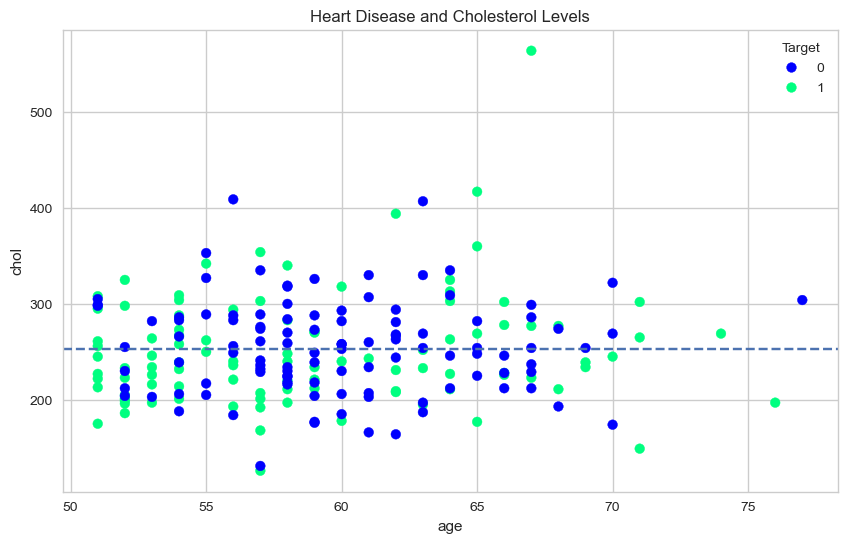

In [128]:
plt.style.use('seaborn-v0_8-whitegrid')
fig ,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=over_50.age,
                     y=over_50.chol,
                    c=over_50.target,
                    cmap="winter") ; # this changes the color scheme
# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel='age',
       ylabel='chol');
# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# add a horizontal line 
ax.axhline(over_50.chol.mean(),
          linestyle='--');

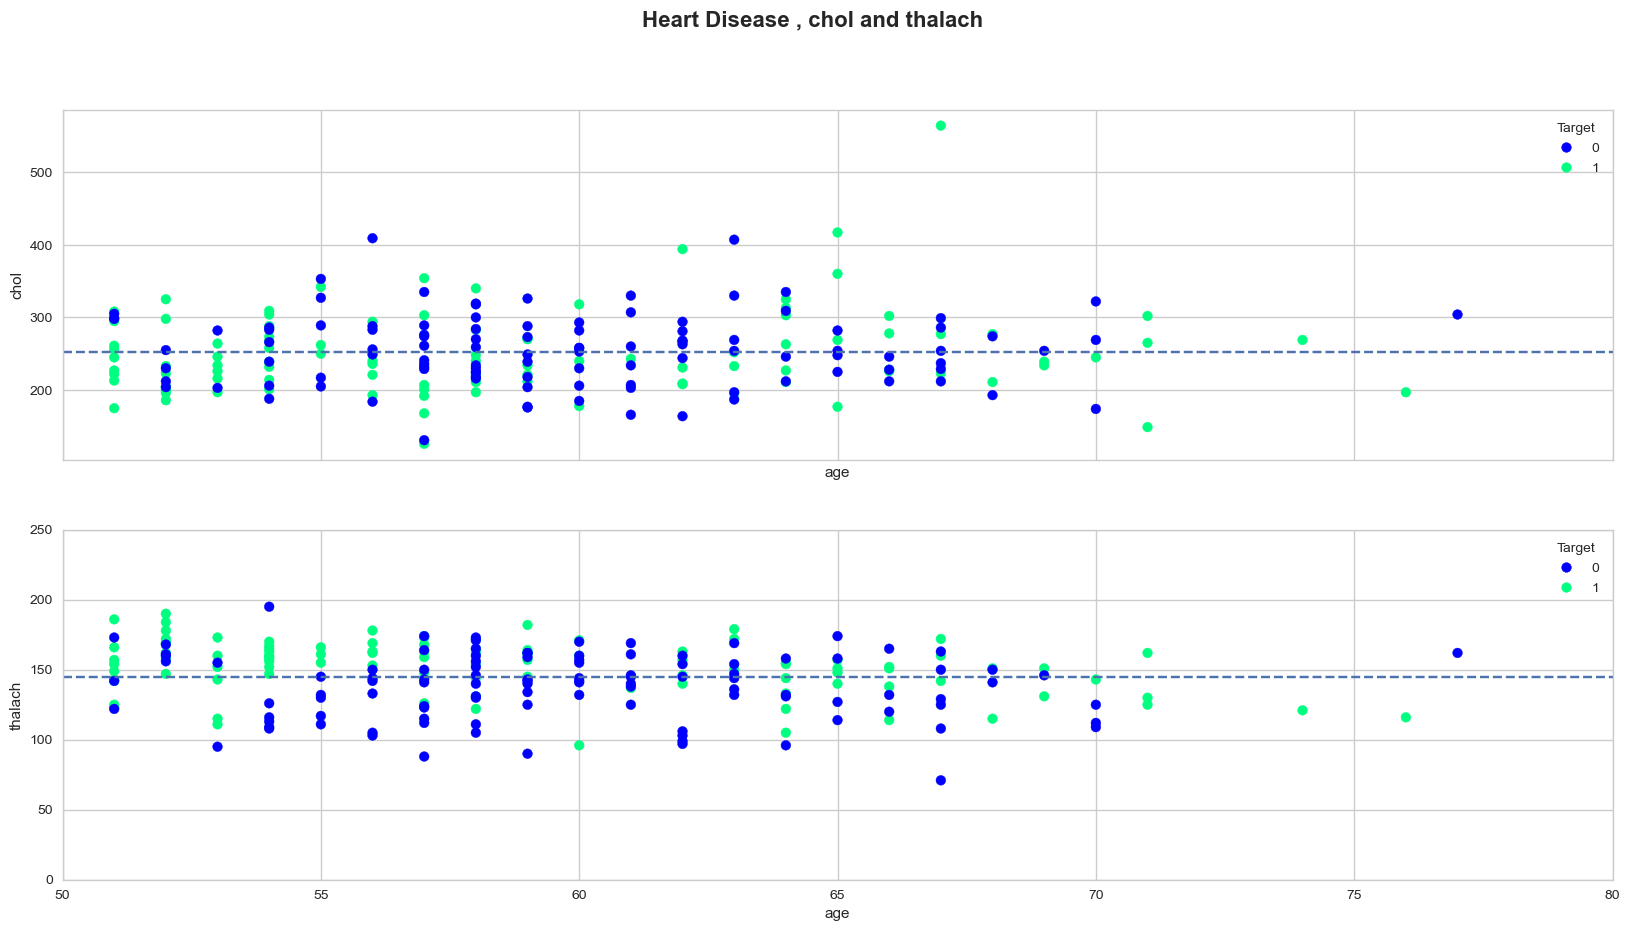

In [147]:
# customising x and y axis limitations

fig, (ax1,ax2) = plt.subplots(figsize=(20,10),nrows=2,ncols=1,sharex=True)
# add x and y to ax1 
scatter = ax1.scatter(x = over_50.age,y = over_50.chol, c = over_50.target,cmap='winter');
#customize the ax1
ax1.set(
    # title="Heart Disease and chol ",
        xlabel= "age",
        ylabel="chol",
        );
#setting  x limit
ax1.set_xlim([50,80])

# add a lengend
ax1.legend(*scatter.legend_elements(), title="Target");
#add a mean line
ax1.axhline(over_50.chol.mean(),linestyle='--');

# add data to ax2
scatter = ax2.scatter(x=over_50.age,y = over_50.thalach, c = over_50.target,cmap='winter');
#customize ax2
ax2.set(
    # title="Heart Disease and thalach ",
        xlabel ="age", ylabel="thalach");
#setting y limit
ax2.set_ylim([0,250])
#add a legend
ax2.legend(*scatter.legend_elements(), title='Target');
# add a mean line
ax2.axhline(over_50.thalach.mean(), linestyle='--');

# add a title to the entire figure
fig.suptitle("Heart Disease , chol and thalach", fontsize=16,fontweight='bold');

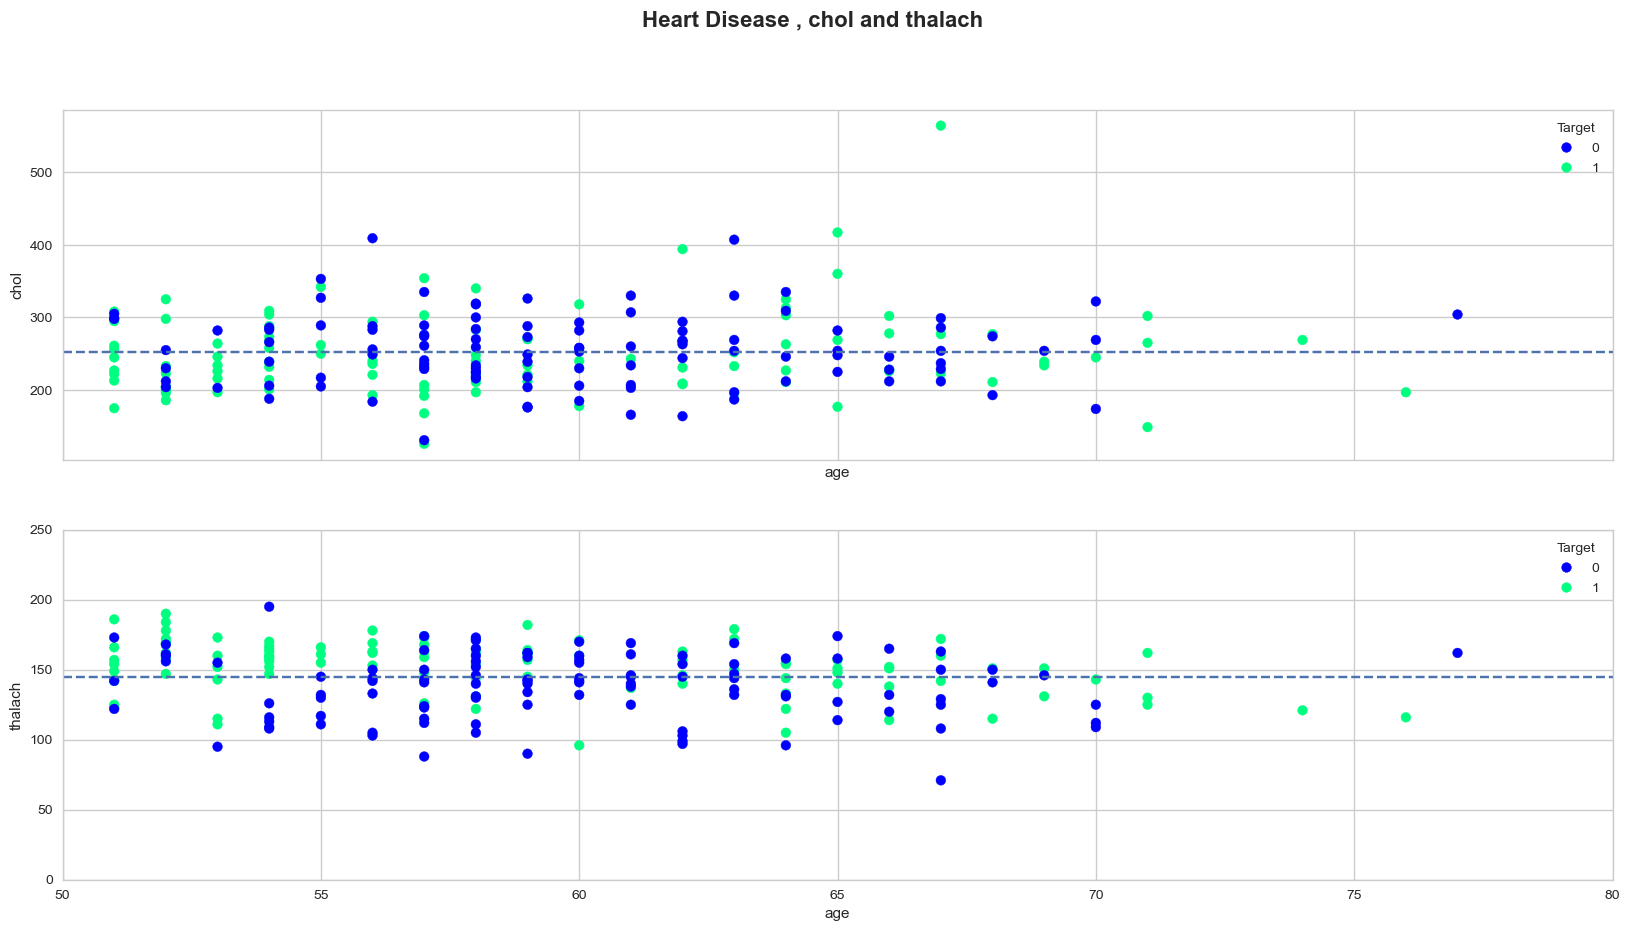

In [148]:
fig

In [149]:
fig.savefig('images/heart-disease-analysis-plot.png')